In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline
from sklearn import svm, metrics
from sklearn.ensemble import RandomForestClassifier

In [26]:
trainfile="../input/train.csv"
testfile="../input/test.csv"
traindata=pd.read_csv(trainfile)
testdata=pd.read_csv(testfile)

In [27]:
traindata_label=traindata.iloc[:,0].values
traindata=traindata.iloc[:,1:].values
traindata=traindata.astype(np.float)
traindata=np.multiply(traindata,1.0/255.0)

testdata=testdata.iloc[:,:].values
testdata=testdata.astype(np.float)
testdata=np.multiply(testdata,1.0/255.0)
print(traindata.shape, testdata.shape)

(42000, 784) (28000, 784)


In [28]:
img_hight=img_width=np.ceil(np.sqrt(traindata.shape[1])).astype(np.uint8)

In [29]:
def shapetoimage(data):
    data_images=np.zeros((data.shape[0],img_hight,img_width))
    for i in range(data.shape[0]):
        data_images[i]=data[i].reshape(img_hight,img_width)
    return data_images

In [30]:
train_images=shapetoimage(traindata)
def imshow(imgs):
    n=len(imgs)
    if n==1:
        plt.axis("off")
        plt.imshow(imgs[0], cmap=cm.binary)
    else:
        sqrt_n=int(np.ceil(np.sqrt(n)))
        fig, axs=plt.subplots(sqrt_n,sqrt_n)
        axs_flat=axs.flatten()
        for img, ax in zip(imgs,axs_flat):
            ax.axis("off")
            ax.imshow(img,cmap=cm.binary)
        for ax in axs_flat[n:]:
            fig.delaxes(ax)   

[[1 0 1 4]
 [0 0 7 3]
 [5 3 8 9]
 [1 3 3 1]]


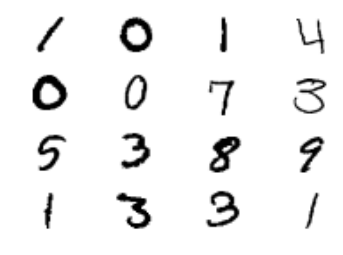

In [31]:
imshow(train_images[:16])
print(traindata_label[:16].reshape(4,4))

In [101]:
ValidationSize=50
ValidationData=traindata[:ValidationSize]
ValidationLabel=traindata_label[:ValidationSize]
traindata_RF=traindata[ValidationSize:]
traindata_label_RF=traindata_label[ValidationSize:]
traindata_label_RF.shape

(41950,)

In [112]:
LearnNumRF=RandomForestClassifier(500)
LearnNumRF.fit(traindata_RF,traindata_label_RF)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [103]:
PredictlabelRF=LearnNumRF.predict(ValidationData)

In [104]:
PredictlabelRF

array([1, 0, 1, 4, 0, 0, 7, 3, 5, 3, 8, 9, 1, 3, 3, 1, 2, 0, 7, 5, 8, 6, 2,
       0, 2, 3, 6, 9, 9, 7, 8, 9, 4, 9, 2, 1, 3, 1, 1, 4, 3, 1, 4, 9, 2, 6,
       3, 7, 7, 4])

In [105]:
ValidationLabel

array([1, 0, 1, 4, 0, 0, 7, 3, 5, 3, 8, 9, 1, 3, 3, 1, 2, 0, 7, 5, 8, 6, 2,
       0, 2, 3, 6, 9, 9, 7, 8, 9, 4, 9, 2, 1, 3, 1, 1, 4, 9, 1, 4, 4, 2, 6,
       3, 7, 7, 4])

In [106]:
print("Classification report for LearnNum %s:\n%s\n"
      % (LearnNumRF, metrics.classification_report(ValidationLabel, PredictlabelRF)))

Classification report for LearnNum RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False):
             precision    recall  f1-score   support

          0       1.00      1.00      1.00         5
          1       1.00      1.00      1.00         8
          2       1.00      1.00      1.00         5
          3       0.88      1.00      0.93         7
          4       1.00      0.83      0.91         6
          5       1.00      1.00      1.00         2
          6       1.00      1.00      1.00         3
          7       1.00      1.00      1.00         5
          8       1.00      1.00      1.00         3
          9       0.83      0.83      0.83         6

avg / total       0.9

In [113]:
Predict_testdata=LearnNumRF.predict(testdata)

[[2 0 9 9 3 7]
 [0 3 0 3 5 7]
 [4 0 4 3 3 1]
 [9 0 9 1 1 5]
 [7 4 2 7 4 7]
 [7 5 4 2 6 2]]


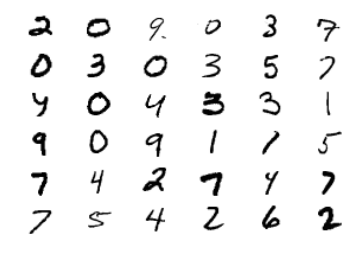

In [114]:
imshow(test_images[:36])
print(Predict_testdata[:36].reshape(6,6))

In [115]:
Tosave=pd.DataFrame({'ImageId': range(1,len(Predict_testdata)+1),'Label': Predict_testdata})
Tosave.to_csv("../input/out.csv", index=False)

In [111]:
saveddata=pd.read_csv("../input/out.csv")
saveddata

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3
5,6,7
6,7,0
7,8,3
8,9,0
9,10,3


(28000, 3)